# –ò–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫

In [321]:
import numpy as np
import pandas as pd
import pandas_profiling

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:,.2f}'.format

import matplotlib
import seaborn as sns
%matplotlib inline

from IPython.display import display, Math, Latex

In [2]:
def get_std(df,f_list):
    z = df[f_list].apply(np.std,axis = 1)
    return StandardScaler().fit_transform(np.array(z).reshape(-1, 1))

# –ß—Ç–µ–Ω–∏–µ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, —Å–º—ã—Å–ª–æ–≤–æ–µ –æ–ø–∏—Å–∞–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [359]:
df = pd.read_excel(r"for_clustering.xlsx")

In [4]:
df.shape

(27508, 45)

In [5]:
df.head()

Id_client  InWeek_amount  InWeek_SKU  Checkinmonth_average  \
0       5743       269.5328          46                     2   
1       5756       359.9902          36                     4   
2       5781       329.3200           9                     4   
3       5801       385.8105          51                     8   
4       5808       310.2800           8                     4   

   Checkamount_mean  Count_transac  Total_amount  Total_SKU_qnt  \
0          102.9252            119      12398.51           1114   
1          100.2813            130      12959.65           1024   
2          102.2027             29       2963.88            170   
3           48.8550            404      19676.34           2486   
4          108.5789             25       2482.24            255   

   Count_departments  Count_shop  ...  Cat_babyprod_share  \
0                 26           4  ...            0.081007   
1                 29           3  ...            0.036766   
2                 24           1  ...            0.112974   
3                 33           3  ...            0.027406   
4                 26           2  ...            0.042788   

   Communication_3month  Response_communcation  SKU_LastMonthqnt  \
0                     1                      1                60   
1                     1                      0                91   
2                     1                      1                13   
3                     1                      0                68   
4                     1                      1                22   

   Checks_LastMonthqnt  Amount_LastMonth Discount  Discount_LastMonth  \
0                   12            963.01        1                   1   
1                   15           1534.69        1                   1   
2                    2           1514.48        1                   1   
3                   35           1872.24        1                   1   
4                    3            557.97        1                   1   

  _SEGMENT_  EM_SEGMENT  
0         2           2  
1         2           2  
2         3           3  
3         2           2  
4         1           1  

[5 rows x 45 columns]

   –£ –Ω–∞—Å –µ—Å—Ç—å –∫–∞–∫–æ–π-—Ç–æ –º–∞–≥–∞–∑–∏–Ω, –≤ –∫–æ—Ç–æ—Ä–æ–º –ø–æ–±—ã–≤–∞–ª–æ 27508 –∫–ª–∏–µ–Ω—Ç–æ–≤. –¢.–∫. —É –Ω–∞—Å –µ—Å—Ç—å –¥–æ–≤–æ–ª—å–Ω–æ –ø–æ–ª–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø–æ –Ω–∏–º, —Ç–æ –ø—Ä–µ–¥–ø–æ–ª–æ–∂—É, —á—Ç–æ —ç—Ç–æ –≤—Å–µ –≤–ª–∞–¥–µ–ª—å—Ü—ã –∫–∞—Ä—Ç –ø–æ—Å—Ç–æ—è–Ω–Ω–æ–≥–æ –ø–æ–∫—É–ø–∞—Ç–µ–ª—è. + 
 
 ### –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ —Å–Ω–∞—á–∞–ª–∞ –Ω–∞–¥–æ –ø–æ–ø—ã—Ç–∞—Ç—å—Å—è —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è —á—Ç–æ –∑–Ω–∞—á–∞—Ç –≤—Å–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ :
  
- **InWeek_amount** - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–¥–µ–ª—å —Å –¥–∞—Ç—ã —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∫–ª–∏–µ–Ω—Ç—Å–∫–æ–π –∫–∞—Ä—Ç—ã (–ú–æ–∂–Ω–æ —Ä–∞–∑–±–∏—Ç—å –Ω–∞ —Å—Ç–∞—Ä—ã—Ö –∏ –Ω–µ–¥–∞–≤–Ω–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤)
- **InWeek_SKU** - –ü–æ–∫–∞–∑–∞—Ç–µ–ª—å –≤ —Ä–∞–º–∫–∞—Ö –æ—Ç 0 –¥–æ 50, SKU - –µ–¥–∏–Ω–∏—Ü–∞ —Ç–æ–≤–∞—Ä–∞ –Ω–∞ —Å–∫–ª–∞–¥–µ. –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —ç—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫—É–ø–ª–µ–Ω–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω—é—é –Ω–µ–¥–µ–ª—é 
- **Checkinmonth_average** - –°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å–µ—â–µ–Ω–∏–π –º–∞–≥–∞–∑–∏–Ω–∞ –∑–∞ –º–µ—Å—è—Ü
- **Checkamount_mean** - –°—Ä–µ–¥–Ω–∏–π —á–µ–∫
- **Count_transac** - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏–π?
- **Total_amount** - –û–±—â–∞—è —Å—É–º–º–∞ –ø–æ–∫—É–ø–æ–∫
- **Total_SKU_qnt** - –ò—Ç–æ–≥–æ–≤–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫—É–ø–ª–µ–Ω–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤
- **–°ount_departments** - –ò–∑ –∫–∞–∫–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–µ–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç–æ–≤ –ø–æ–∫—É–ø–∞–µ—Ç
- **Count_shop** - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å–µ—â–µ–Ω–Ω—ã—Ö –º–∞–≥–∞–∑–∏–Ω–æ–≤
- **Count_city** - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å–µ—â–µ–Ω–Ω—ã—Ö –≥–æ—Ä–æ–¥–æ–≤ –≤ –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –º–∞–≥–∞–∑–∏–Ω—ã
- **Tenure** - –º–æ–∂–µ—Ç –±—ã—Ç—å —Å—Ç–∞–∂?
- **SKU_meanbytransac** - –°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–≤–∞—Ä–æ–≤ –≤ —á–µ–∫–µ
- **Amount_last6mnth** - –°—É–º–º–∞ –∑–∞ 6 –º–µ—Å—è—Ü–µ–≤
- **Check_qntlast6mnth** - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞ 6 –º–µ—Å—è—Ü–µ–≤
- **SKU_price_mean** - –°—Ä–µ–¥–Ω—è—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–¥–Ω–æ–π –µ–¥–∏–Ω–∏—Ü—ã —Ç–æ–≤–∞—Ä–∞
- **Gender** - –ü–æ–ª
- **Age** - –≤–æ–∑—Ä–∞—Å—Ç
- **Age_group** - –í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞
- **Interval_visit** - –°–æ–≤–æ–∫—É–ø–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å–µ—â–µ–Ω–∏–π
- **Days_pastvisit** - –¥–Ω–µ–π —Å –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –≤–∏–∑–∏—Ç–∞
- **Cat_householdchem_qnt** - –ü–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤—Å–µ –æ—á–µ–≤–∏–¥–Ω–æ
- **Cat_householdchem_amount**
- **Cat_householdchem_share**
- **Cat_careproducts_qnt**
- **Cat_careproducts_amount**
- **Cat_careproducts_share**
- **Cat_toiletries_qnt**
- **Cat_toiletries_amount**
- **Cat_toiletries_share**
- **Cat_healthwellnes_qnt**
- **Cat_healthwellnes_amount**
- **Cat_healthwellnes_share**
- **Cat_babyprod_qnt**
- **Cat_babyprod_amount**
- **Cat_babyprod_share**
- **Communication_3month** - –ë—ã–ª–∞ –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –≤ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 3 –º–µ—Å—è—Ü–∞
- **Response_communcation** - –ë—ã–ª –æ—Ç–≤–µ—Ç –Ω–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
- **SKU_LastMonthqnt** - –°–∫–æ–ª—å–∫–æ —Ç–æ–≤–∞—Ä–æ–≤ –∫—É–ø–ª–µ–Ω–æ–≤ –ø–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü
- **Checks_LastMonthqnt** - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —á–µ–∫–æ–≤ –ø–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü
- **Amount_LastMonth** - –û–±—ä–µ–º –ø–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü
- **Discount** - —Å–∫–∏–¥–∫–∞ –Ω–∞ –∞–∫–∫–∞—É–Ω—Ç–µ —Å–µ–π—á–∞—Å
- **Discount_LastMonth** - —Å–∫–∏–¥–∫–∞ –Ω–∞ –∞–∫–∫–∞—É–Ω—Ç—ã –≤ –ø—Ä–æ—à–ª–æ–º –º–µ—Å—è—Ü–µ
- **SEGMENT** - –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ —ç—Ç–æ –≤–µ—Ä–Ω—ã–µ –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤

## –ò–∑–±–∞–≤–ª—è–µ–º—Å—è –æ—Ç Nan

In [24]:
sum([True for idx,row in df.iterrows() if any(row.isnull())])

241

–£ –Ω–∞—Å  –≤—Å–µ–≥–æ 241 –ø–æ–∫—É–ø–∞—Ç–µ–ª—å —Å –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–º–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏, –Ω–∞ –æ—Ü–µ–Ω–∫—É —Å–∏–ª—å–Ω–æ –Ω–µ –ø–æ–≤–ª–∏—è–µ—Ç, —á—Ç–æ –º—ã –ø—Ä–æ—Å—Ç–æ –¥—Ä–æ–ø–Ω–µ–º –∏—Ö –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞, –Ω–æ –≤ –±—É–¥—É—â–µ–º –º–æ–∂–Ω–æ –±—É–¥–µ—Ç –ø–æ—Ä–∞–±–æ—Ç–∞—Ç—å –∏ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å –º–æ–¥–µ–ª—å, –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä—É—é—â—É—é –∑–∞–º–µ–Ω—è—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è

In [28]:
df.dropna(inplace = True)
df.shape

(27267, 44)

### –ü–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∫–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [30]:
Gender = {'M':1,
          'F':2,
         }
Age_group = {'0-25':0,
             '25-35':1,
             '35-45':2,
             '45-55':3,
             '55-65':4,
             '65+':5
              }

In [33]:
df['Gender_map'] = df['Gender'].map(Gender)
df['Age_map'] = df['Age_group'].map(Age_group)

In [36]:
df.drop(['Age_group','Gender'], axis = 1, inplace = True)

### –û—Ü–µ–Ω–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

In [40]:
df_col_x = list(df.columns)
[df_col_x.remove(i) for i in ['Id_client', '_SEGMENT_', 'EM_SEGMENT']]
df_x = df[df_col_x]

In [361]:
df.describe()

Id_client  InWeek_amount  InWeek_SKU  Checkinmonth_average  \
count  27,508.00      27,508.00   27,508.00             27,508.00   
mean  210,314.23         314.79       31.46                  2.57   
std   121,828.91         144.49       11.38                  1.21   
min     5,743.00          34.47        2.00                  2.00   
25%   105,405.50         213.04       23.00                  2.00   
50%   211,786.00         289.22       31.00                  2.00   
75%   309,746.25         385.38       41.00                  2.00   
max   830,188.00       2,180.01       51.00                 20.00   

       Checkamount_mean  Count_transac  Total_amount  Total_SKU_qnt  \
count         27,508.00      27,508.00     27,508.00      27,508.00   
mean             159.52          82.47      9,595.76         764.24   
std              111.53          63.24      4,715.29         451.73   
min               10.24           4.00        739.36          33.00   
25%               85.73          39.00      5,897.18         433.00   
50%              128.75          66.00      8,820.70         674.00   
75%              199.25         108.00     12,631.30       1,003.00   
max            1,326.12         990.00     22,748.39       5,058.00   

       Count_departments  Count_shop  ...  Cat_babyprod_share  \
count          27,508.00   27,508.00  ...           27,508.00   
mean               26.74        3.86  ...                0.06   
std                 4.04        2.76  ...                0.05   
min                 7.00        1.00  ...                0.00   
25%                24.00        2.00  ...                0.02   
50%                27.00        3.00  ...                0.05   
75%                30.00        5.00  ...                0.08   
max                38.00       46.00  ...                0.89   

       Communication_3month  Response_communcation  SKU_LastMonthqnt  \
count             27,508.00              27,508.00         27,508.00   
mean                   1.00                   0.55             40.34   
std                    0.01                   0.50             23.77   
min                    0.00                   0.00              1.00   
25%                    1.00                   0.00             22.00   
50%                    1.00                   1.00             37.00   
75%                    1.00                   1.00             55.00   
max                    1.00                   1.00            180.00   

       Checks_LastMonthqnt  Amount_LastMonth  Discount  Discount_LastMonth  \
count            27,508.00         27,508.00 27,508.00           27,508.00   
mean                  8.40            936.14      1.00                0.92   
std                   7.22            590.93      0.04                0.27   
min                   1.00             99.00      0.00                0.00   
25%                   3.00            446.88      1.00                1.00   
50%                   6.00            825.89      1.00                1.00   
75%                  11.00          1,329.79      1.00                1.00   
max                 112.00          2,478.47      1.00                1.00   

       _SEGMENT_  EM_SEGMENT  
count  27,508.00   27,508.00  
mean        2.00        2.00  
std         0.78        0.78  
min         1.00        1.00  
25%         1.00        1.00  
50%         2.00        2.00  
75%         3.00        3.00  
max         3.00        3.00  

[8 rows x 43 columns]

MemoryError: 

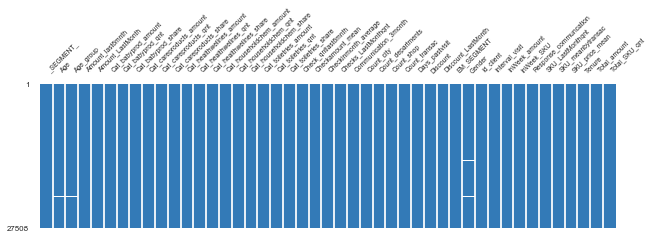

In [360]:
pandas_profiling.ProfileReport(df)

_–ù–µ–º–Ω–æ–≥–æ —á–∏—Ç–µ—Ä—Å–∫–∏–π —Å–ø–æ—Å–æ–±, –Ω–æ –æ—á–µ–Ω—å —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–π_
### –ò—Å—Ö–æ–¥—è –∏–∑ –¥–∞–Ω–Ω—ã—Ö –¥–µ–ª–∞–µ–º —Å–ª–µ–¥—É—é—â–∏–µ –≤—ã–≤–æ–¥—ã:
- –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Å–∫–∏–¥–∫–∞—Ö –∏ –æ Communication_3month - –±–µ—Å–ø–æ–ª–µ–∑–Ω–∞—è, –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –≤–∞—Ä–∏–∞—Ü–∏—è
- –£–¥–∞–ª—è–µ–º –≤–æ–∑—Ä–∞—Å—Ç, –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ –ø–µ—Ä–µ–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—É—é –∫–µ–º-—Ç–æ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫—É
- –ø–æ–∫—É–ø–∞—é—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ —Å—Ç–æ–ª—å–∫–æ –∂–µ –¥–µ—Ç—Å–∫–∏—Ö —Ç–æ–≤–∞—Ä–æ–≤ –∫–∞–∫ –∏ —Ç–æ–≤–∞—Ä–æ–≤—ã –ø–æ —É—Ö–æ–¥—É –∑–∞ —Å–æ–±–æ–π


In [99]:
df_x.drop(['Discount','Communication_3month','Count_city'],axis = 1,inplace = True)

In [100]:
df_x.corr().style.background_gradient(cmap='coolwarm')

–°—Ç—Ä–∞–Ω–Ω–∞—è —Å–∏—Ç—É–∞—Ü–∏—è –≤ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –ø–æ–ª–Ω–æ–π –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ (œÅ = 0.99995) –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–µ—Ç—Å–∫–æ–π –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–æ–≤–∞—Ä–æ–≤ –ø–æ —É—Ö–æ–¥—É –∑–∞ —Å–æ–±–æ–π, –Ω–µ—Ç —Å–º—ã—Å–ª–∞ –≤–∫–ª—é—á–∞—Ç—å –æ–±–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è 

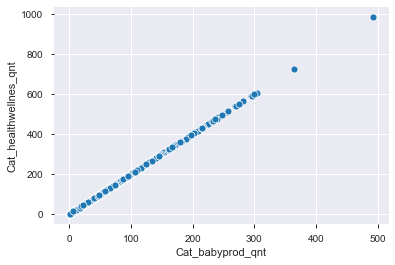

In [47]:
sns.scatterplot(x='Cat_babyprod_qnt', y='Cat_healthwellnes_qnt', data=df_x)

In [48]:
df_x.drop('Cat_healthwellnes_qnt',axis = 1,inplace = True)

–¢–µ–∫—É—â–µ–π –∑–∞–¥–∞—á–µ–π —è–≤–ª—è–µ—Ç—Å—è –º–∏–Ω–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –∏ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å —Ñ–∞–∫—Ç–æ—Ä—ã, –≤–æ—Ç –Ω–µ—Å–∫–æ–ª—å–∫–æ –∏–¥–µ–π –∫–∞–∫ —ç—Ç–æ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å:

     –£ –∫–∞–∂–¥–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞ —É –Ω–∞—Å –µ—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ —Ä–∞–∑–±–∏—Ç—ã–µ –ø–æ –≤—Ä–µ–º–µ–Ω–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞–º –Ω—É–∂–Ω—ã –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —è–≤–ª—è–µ—Ç—Å—è –ª–∏ –∫–ª–∏–µ–Ω—Ç –ø–æ—Å—Ç–æ—è–Ω–Ω—ã–º, —á–∞—Å—Ç–æ –ª–∏ –æ–Ω –∏—Å–ø–æ–ª—å–∑—É–µ—Ç –Ω–∞—à –º–∞–≥–∞–∑–∏–Ω –∏ –≤  –∫–∞–∫–æ–º –æ–±—ä–µ–º–µ. –ï—Å–ª–∏ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ —ç—Ç–æ—Ç –∏–Ω—Ç–µ—Ä–µ—Å—É—é—â–∏–π –Ω–∞—Å –∫—Ä–∏—Ç–µ—Ä–∏–π, —Ç–æ –≤—Å–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏, —Ä–∞–∑–∏—Ç—ã–µ –Ω–∞ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–æ–º–µ–∂—É—Ç–∫–∏ –º–æ–∂–Ω–æ –ø–µ—Ä–µ–∫–æ–Ω–≤–µ—Ä—Ç–∏—Ä–æ–≤–∞—Ç—å –≤ –æ—Ü–µ–Ω–∫—É –ø–æ —ç—Ç–æ–º—É –ø–∞—Ä–∞–º–µ—Ç—Ä—É. –õ–æ–≥–∏–∫–∞ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å —Ç–∞–∫–æ–π, —á—Ç–æ —á–µ–º –±–æ–ª—å—à–µ —ç—Ç–æ—Ç –∫–æ—ç—Ñ., —Ç–µ–º —Å–∏–ª—å–Ω–µ–µ –≤–æ–∑—Ä–∞—Å—Ç–∞–µ—Ç –æ–±—ä–µ–º –¥–∞–Ω–Ω–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –≤–æ –≤—Ä–µ–º–µ–Ω–∏. 

    –ü–æ–ª—É—á–∞–µ—Ç—Å—è —É —Ç–µ—Ö, –∫—Ç–æ –ø—Ä–æ—Å—Ç–æ  –∑–∞–±–µ–∂–∞–ª –ø–∞—Ä—É —Ä–∞–∑ –≤ –º–∞–≥–∞–∑–∏–Ω - –æ—Ü–µ–Ω–∫–∞ –ø–æ —ç—Ç–æ–º—É –∫–æ—ç—Ñ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å –º–Ω–∏–º–∞–ª—å–Ω–∞ –∏ —á–µ–º –±–æ–ª—å—à–µ –ø–æ—Å–µ—â–∞–ª - —Ç–µ–º –±–æ–ª—å—à–µ –æ–Ω–∞ –¥–æ–ª–∂–Ω–∞ –±—ã—Ç—å

–î–∞–Ω–Ω–æ–π –æ–ø–µ—Ä–∞—Ü–∏–µ–π –º—ã –∏–∑–±–µ–∂–∏–º –∏–∑–ª–∏—à–Ω–µ–π –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–æ–∏—Å—Ö–æ–¥–∏–ª–∞ –∫–æ–Ω–≤–µ—Ä—Ç–∞—Ü–∏—è –±—É–¥—É—Ç —É–¥–∞–ª–µ–Ω—ã) –∏ —Å–æ–∫—Ä–∞—Ç–∏–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–æ –ø–æ –∫–æ—Ç–æ—Ä–æ–º—É –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç—å –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—é

–°–∞–º—ã–º –ø—Ä–æ—Å—Ç—ã–º —Ä–µ—à–µ–Ω–∏–µ–º –±—É–¥—É—Ç –≤—ã–≤–µ—Å—Ç–∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–∫–≤–∞—Ç—Ä–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ(–° —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –±—ã–ª–æ –±—ã –ø—Ä–∞–≤–∏–ª—å–Ω–æ —Å–Ω–∞—á–∞–ª–∞ —Ä–∞–∑–¥–µ–ª–∏—Ç—å –≤—Å–µ –ø—Ä–æ–º–µ–∂—É–∫—Ç–∏ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –∏—Ö –≤—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º–∏, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –æ—Ü–µ–Ω–∫—É –Ω–∞ –Ω–∞ 1, –Ω–∞–ø—Ä–∏–º–µ—Ä —Å—É–º–º—É –∑–∞ 30 –¥–Ω–µ–π —Ä–∞–∑–¥–µ–ª–∏—Ç—å –Ω–∞ 30, –Ω–æ —è —Ö–æ—á—É —É–∑–Ω–∞—Ç—å –±—ã–ª–∞ –ª–∏ –≤–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –≤–æ–æ–±—â–µ)


In [49]:
amount_collide = ['InWeek_amount','Total_amount',
                  'Amount_last6mnth', 'Amount_LastMonth']
sku_collide = ['InWeek_SKU','Total_SKU_qnt',
               'SKU_meanbytransac', 'SKU_LastMonthqnt']
check_collide = ['Checkamount_mean','Check_qntlast6mnth',
                 'Checks_LastMonthqnt','Checkinmonth_average']

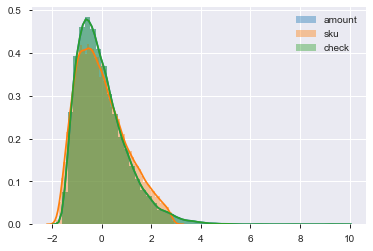

In [50]:
amount = get_std(df_x,amount_collide)
sku = get_std(df_x,sku_collide)
check = get_std(df_x,sku_collide)
f, ax = plt.subplots(1, 1)
sns.distplot(sku)
sns.distplot(amount)
sns.distplot(check)
plt.legend(labels=['amount', 'sku', 'check'])

In [51]:
df_x['amount_collide'], df_x['sku_collide'], df_x['check_collide'] = amount,sku,check

In [52]:
df_x.drop(amount_collide + sku_collide + check_collide,axis = 1,inplace = True)

In [53]:
df_x.shape

(27267, 31)

## –°–ª–µ–¥—É—â–µ–π –∏–¥–µ–µ–π —è–≤–ª—è–µ—Ç—Å—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Ç–æ–≤–∞—Ä–∞. 

    –£ –Ω–∞—Å –µ—Å—Ç—å 5 –∫–∞—Ç–µ–≥–æ—Ä–∏–π, –ø—Ä–∏—á–µ–º —É –∫–∞–∂–¥–æ–π –∏–∑ –∫–∞—Ç–µ–≥–æ—Ä–∏–π —É –µ—Å—Ç—å—Ç—Ä–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞: 
     - 1. - –°—É–º–º–∞, –ø–æ—Ç—Ä–∞—á–µ–Ω–Ω–∞—è –Ω–∞ –¥–∞–Ω–Ω—É—é –∫–∞—Ç–µ–≥—Ä–∏—é –∑–∞ –≤—Å–µ –≤—Ä–µ–º—è
     - 2. - –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–≤–∞—Ä–æ–≤, –∫—É–ø–ª–µ–Ω–Ω—ã—Ö –≤ –¥–∞–Ω–Ω–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
     - 3. - –î–æ–ª—è –æ—Ç –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π (–ø—Ä–∏—á–µ–º —Å—É–º–º–∞ –¥–æ–ª–µ–π –ø–æ –ø—è—Ç–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤—Å–µ–≥–¥–∞ —Ä–∞–≤–Ω–∞ 1)

–°–æ–±—Å—Ç–≤–µ–Ω–Ω–æ, —É –Ω–∞—Å —É–∂–µ –µ—Å—Ç—å –º–µ—Ä–∞ —É—á–µ—Ça –∏–∑–º–µ–Ω—á–∏–≤–æ—Å—Ç–∏ –æ–±—â–µ–≥–æ –æ–±—ä–µ–º–∞ –∏ —Å—É–º–º, –Ω–∞–º –Ω–µ—Ç —Å–º—ã—Å–ª–∞ –¥—É–±–ª–∏—Ä–æ–≤–∞—Ç—å –¥–æ–ª–µ–≤–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–ª–∏ —Å—É–º–º, –∞ —Ç–æ–ª—å–∫–æ –æ—Å—Ç–∞–≤–∏—Ç—å –¥–æ–ª—é. –ë–ª–∞–≥–æ–¥–∞—Ä—è –∞–≥—Ä–µ–≥–∞—Ç–∞–º –≤—ã—à–µ –º—ã —É–∂–µ –∏ —Ç–∞–∫ –ø–æ–Ω–∏–º–∞–µ–º - —Å–∫–æ–ª—å–∫–æ –∏ –∑–∞ —Å–∫–æ–ª—å–∫–æ –ø–æ–∫—É–ø–∞–µ—Ç –∫–ª–∏–µ–Ω—Ç, –Ω–æ –≤–æ—Ç —á—Ç–æ –∏–º–µ–Ω–Ω–æ - –µ—â–µ –Ω–µ—Ç, —Ç—É—Ç –ø–æ–º–æ–∞–≥–µ—Ç –∫–∞–∫ —Ä–∞–∑ —Å—Ç—Ä—É–∫—Ç—É—Ä–Ω–∞—è –¥–æ–ª—è.

In [54]:
df_x.drop(['Cat_householdchem_qnt', 'Cat_householdchem_amount',
        'Cat_careproducts_qnt',
       'Cat_careproducts_amount', 
       'Cat_toiletries_qnt', 'Cat_toiletries_amount', 'Cat_toiletries_share',
        'Cat_healthwellnes_amount',
        'Cat_babyprod_qnt', 'Cat_babyprod_amount'],axis = 1,inplace = True)

In [101]:
df_x.shape

(27267, 18)

### –°—Ç–∞–Ω–∞–¥—Ä—Ç–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö

–î–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –∏—Å–ø–æ–ª—å–∑–≤–∞—Ç—å –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–æ–Ω–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏ –∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞, –æ—Å–Ω–æ–≤–∞–Ω—ã–µ –Ω–∞ –º–µ—Ä–µ —Ä–∞—Å—Å—Å—Ç–æ—è–Ω–∏—è - –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –æ—Å—É—â–µ—Å—Ç–∏–≤–∏—Ç—å –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ. –û–Ω–æ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –≤–∞—à–∏ –¥–∞–Ω–Ω—ã–µ —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ –µ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±—É–¥–µ—Ç –∏–º–µ—Ç—å —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ 0 –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ 1.

In [102]:
scaler = StandardScaler()

In [103]:
sc = scaler.fit_transform(df_x)

In [104]:
df_sc = pd.DataFrame(sc,columns = df_x.columns)

In [105]:
df_sc.head(3)

Count_transac  Count_departments  Count_shop    Tenure  SKU_price_mean  \
0       0.587046          -0.183048    0.051558  1.004154       -0.578183   
1       0.762221           0.560129   -0.310768  0.061583       -0.231497   
2      -0.846203          -0.678500   -1.035418 -1.823559        0.471205   

   Interval_visit  Days_pastvisit  Cat_householdchem_share  \
0       -0.783864       -0.506027                -0.102780   
1       -0.783864       -0.725633                 1.001723   
2        2.042607        0.592002                -2.212983   

   Cat_careproducts_share  Cat_healthwellnes_share  Cat_babyprod_share  \
0               -0.397000                 0.189829            0.457476   
1               -0.141743                 0.105860           -0.446387   
2                3.076349                 0.754606            1.110557   

   Response_communcation  Discount_LastMonth  Gender_map   Age_map  \
0               0.908956            0.292869     0.67219 -0.240037   
1              -1.100164            0.292869     0.67219 -0.950379   
2               0.908956            0.292869     0.67219 -0.950379   

   amount_collide  sku_collide  check_collide  
0        0.610437     0.764611       0.764611  
1        0.654492     0.551047       0.551047  
2       -1.438880    -1.296984      -1.296984

### –°–Ω–∏–∂–µ–Ω–∏–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ (Dimensionality  reduction)

–ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –º–µ—Ç—Ä–∏–∫ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –æ—Å–Ω–æ–≤–∞–Ω—ã –Ω–∞ —Ä–∞—Å—Ç–æ—è–Ω–∏—è—Ö –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏—è –Ω–∞ –æ–ø–µ—Ä–µ–¥–ª–µ–Ω–Ω—ã—Ö —Ç–æ—á–∫–∞—Ö –æ—Å–µ–π –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç. –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, –∫–ª–∞—Å—Ç–µ—Ä–∏–∑—É–µ–º –ø–æ –¥–≤—É–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º - 2D, —Ç—Ä–µ–º - 3D –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ —É –Ω–∞—Å 18 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –û–¥–Ω–∏–º –∏–∑ –º–µ—Ç–æ–¥–æ–≤ —Å–Ω–∏–∂–µ–Ω–∏—è —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏ –Ω–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ –≤–∫–ª–∞–¥–∞ –≤ –∏–∑–º–µ–Ω–µ–Ω–∏–µ –≤–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç–∏ —è–≤–ª—è–µ—Ç—Å—è –º–µ—Ç–æ–¥ –≥–ª–∞–≤–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç (PCA). 

–î–∞–Ω–Ω—ã–π –º–µ—Ç–æ–¥, –ø—É—Ç–µ–º –æ—Ü–µ–Ω–∫–∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–π –≤—ã–±–æ—Ä–æ—á–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –∫–∞–∂–¥–æ–π –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã –Ω–∞—Ö–æ–¥–∏—Ç —Ç–∞–∫—É—é –∞–ø–ø—Ä–æ–∫–∏—Å–º–∏–∞—Ü–∏—é (–≤—ã—Ä–∞–∂–µ–Ω–Ω—É—é –ª–∏–Ω–µ–π–Ω–æ), –∫–æ—Ç–æ—Ä–∞—è –æ–±—ä—è—Å–Ω—è—Ç –∫–∞–∫—É—é-—Ç–æ (–Ω–∞–∏–±–æ–ª—å—à—É—é –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–æ–ª–∏—á–µ—Ç—Å–≤–∞ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç) —á–∞—Å—Ç—å –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –æ–±—â–µ–π –≤—ã–±–æ—Ä–∫–∏

In [170]:
com = list(range(2,19))
variance = {}
for i in com:
    pca = PCA(n_components = i)
    pca_result = pca.fit_transform(df_sc.values)
    variance.update({i:sum(pca.explained_variance_ratio_)})

In [151]:
variance

{2: 0.3922324735684205,
 3: 0.4745541585568369,
 4: 0.5417365685224859,
 5: 0.6048805768375991,
 6: 0.6601508037597524,
 7: 0.7128966431974271,
 8: 0.7614798822250689,
 9: 0.8097117768420762,
 10: 0.8525638366796537,
 11: 0.8870380294495802,
 12: 0.9168150260337893,
 13: 0.9451011792828607,
 14: 0.9703700636300933,
 15: 0.9868802741685163,
 16: 0.9951502428066599,
 17: 0.9999999999999999,
 18: 0.9999999999999999}

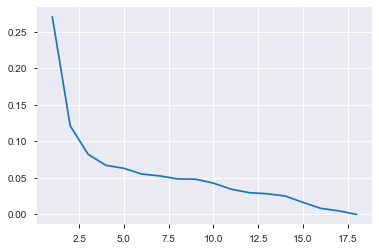

In [174]:
sns.lineplot(y = pca.explained_variance_ratio_, x = list(range(1,19)))

–°—Ç–æ–∏—Ç –≤—ã–±—Ä–∞—Ç—å 8 –≥–ª–∞–≤–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç, –æ–±—ä—è—Å–Ω—è—é—â–∏—Ö 76+% –≤—ã–±–æ—Ä–∫–∏. –¢–µ–ø–µ—Ä—å –∏—Ö –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –ª–æ–≥–∏–∫–∏ –∏ –∫–∞–∫-—Ç–æ –Ω–∞–∑–≤–∞—Ç—å –¥–ª—è —É–ø—Ä–æ—â–µ–Ω–∏—è –≤ –±—É–¥—É—â–µ–º –∫–∞–∫–∏—Ö-—Ç–æ –≤—ã–≤–æ–¥–æ–≤ –¥–ª—è –±–∏–∑–Ω–µ—Å–∞

In [175]:
pca = PCA(n_components = 8)
pca_result = pca.fit_transform(df_sc.values)

In [178]:
pca_df = pd.DataFrame(pca_result,columns = ['PCA_{}'.format(i) for i in range(1,9)])

In [180]:
pca_df.head(3)

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0  1.481949  0.498657 -0.839990 -0.022778 -0.502160 -0.161908 -0.244663   
1  1.827477 -0.035325 -0.229833 -0.885628  0.112498 -0.950263 -0.109569   
2 -3.636357  0.941869  1.882374  0.569939 -3.054188 -0.305566 -0.422600   

      PCA_8  
0  0.074105  
1 -1.097747  
2  0.689160

In [185]:
pd.DataFrame(pca.components_, index = ['PCA_{}'.format(i) for i in range(1,9)], columns = df_sc.columns).T.style.background_gradient(cmap='coolwarm')

 - PCA_1 - "–®–æ–ø–æ–≥–æ–ª–∏–∑–º" - –ù–∞–¥–æ –ø–æ–∫—É–ø–∞—Ç—å –º–Ω–æ–≥–æ –∏ –≤—Å–µ–≥–æ 
 - PCA_2 - "–ó–¥–æ—Ä–æ–≤—å–µ" - –ø—Ä–∏–æ—Ä–µ—Ç–∏–∑–∞—Ü–∏—è –º–µ–¥–∏–∫–∞–º–µ–Ω—Ç–æ–≤ –∏ —Ç–æ–≤–∞—Ä–æ–≤ –∑–∞–±–æ—Ç—ã –æ —Å–µ–±–µ, –Ω–∏–∂–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –≤–æ–∑—Ä–∞—Å—Ç–∞
 - PCA_3 - "–ö—Ä–∞—Å–æ—Ç–∞" - –ø–æ–∫—É–ø–∫–∞ —Ç–æ–≤–∞—Ä–æ–≤ –∑–∞–±–æ—Ç—ã –æ —Å–µ–±–µ –ø—Ä–∏–æ—Ä–µ—Ç–µ–∑–∏—Ä—É—é—Ç—Å—è –Ω–∞–¥ –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏, —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ –Ω–∏–∂–µ —Å—Ä–µ–¥–Ω–µ–≥–æ –≤–æ–∑—Ä–∞—Å—Ç–∞
 - PCA_4 - "–õ–æ—è–ª—å–Ω–æ—Å—Ç—å" - –ø–æ—Å—Ç–æ—è–Ω—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–∞ –≤ –≤—ã–±–æ—Ä–µ —ç—Ç–æ–≥–æ –º–∞–≥–∞–∑–∏–Ω–∞ 
 - PCA_5 - "–•–∏–º–∏—è+–≤–æ–∑—Ä–∞—Å—Ç" - –ú–∞–ª–æ —Ç–æ–≤–∞—Ä–æ–≤ –∑–∞–±–æ—Ç—ã –æ —Å–µ–±–µ, –º–Ω–æ–≥–æ –≤–æ–∑—Ä–∞—Å—Ç–∞ –∏ —Ö–∏–º–∏–∏
 - PCA_6 - "–í–æ–∑—Ä–∞—Å—Ç–Ω–∞—è_—Ö–∞—Ä–∞–∫–µ—Ç—Ä–∏—Å—Ç–∏–∫–∞" -  –ú–∞–ª–æ –ø–æ–∫—É–ø–∞—é—Ç —Ç–æ–≤–∞—Ä–æ–≤ –¥–ª—è –¥–æ–º–∞
 - PCA_7 - "–ì–ª—É—Ö–æ—Å—Ç—å –∫ —Ä–µ–∫–ª–∞–º–µ"
 - PCA_8 - "–ì—Ä–∞–º–æ—Ç–Ω–æ—Å—Ç—å –≤ –ø–æ–∫—É–ø–∫–µ" - –≤–∞–∂–Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å, —Å–∫–∏–¥–∫–∏

### –ü—Ä–æ—Ü–µ—Å—Å –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏

In [188]:
from sklearn import mixture

In [208]:
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')

In [210]:
clf.fit(pca_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

–¢–∞–±–ª–∏—Ü–∞ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏(–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏) –∫–∞–∂–¥–æ–≥–æ –∏–∑ –∫–ª–∏–µ–Ω—Ç–æ–≤ –∫ –æ–¥–Ω–æ–º—É –∏–∑ —Ç—Ä–µ—Ö –∫–ª–∞—Å—Ç–µ—Ä–æ–≤:

In [332]:
pd.DataFrame(clf.predict_proba(pca_df)).head().style.background_gradient(cmap='PiYG')

In [335]:
cluster = clf.predict(pca_df)

### –ò–Ω—Ç–µ—Ä–µ–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏

–ú—ã –∏–º–µ–µ–º 28 —Ä–∞–∑–∏—á–Ω—ã—Ö —Å–æ—á–µ—Ç–∞–Ω–∏–π PCA, –∫–æ—Ç–æ—Ä—ã–µ —Ä–∞–∑–±–∏—Ç—ã –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤. 

In [325]:
display(Math(r'C_{8}^{2} = \frac{8!}{2! \cdot (8-2)!} = \frac{8!}{2! \cdot 6!} = \frac{7 \cdot 8}{1 \cdot 2} = 28'))

<IPython.core.display.Math object>

–õ—É—á—à–∏–º –≤–∞—Ä–∏–∞–Ω—Ç–æ–º –±—ã–ª–æ –±—ã –ø–µ–µ—Ä–µ–±—Ä–∞—Ç—å —ç—Ç–∏ 28 –≥—Ä–∞—Ñ–∏–∫–æ–≤ –∏ –ø–æ–Ω—è—Ç—å –∫–∞–∫ –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–æ–≤–∞–ª–∏—Å—å –∏ –∫–∞–∫ –∏—Ö –º–æ–∂–Ω–æ –æ–ø–∏—Å–∞—Ç—å –¥–ª—è –±–∏–∑–Ω–µ—Å-–Ω—É–∂–¥.–õ–∏–±—é —É–º–µ–Ω—å—à–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ PCA –∏ —Å–¥–µ–ª–∞—Ç—å –≤—Å–µ –ø—Ä–æ—â–µ, –Ω–æ –º–µ–Ω–µ–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ (–º—ã –∏ —Ç–∞–∫ –ø–æ—Ç–µ—Ä—è–ª–∏ –≤–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –Ω–∞ –º–µ—Ç–æ–¥–µ –≥–ª–∞–≤–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç)

In [355]:
pca_df['cluster'] = cluster
df['cluster'] = cluster

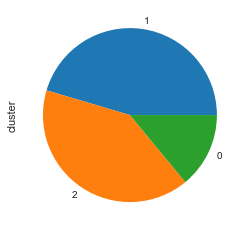

In [351]:
pca_df['cluster'].value_counts().plot(kind='pie')

–Ω–∞ –æ—Å–Ω–æ–≤–µ –∞–Ω–∞–ª–∏–∑–∞ —Ç–æ—á–µ—á–Ω—ã—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤ (–∫–∞–∫ –Ω–∏–∂–µ) –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏—è

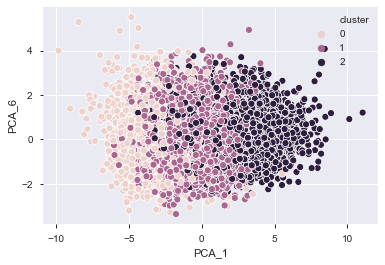

In [352]:
sns.scatterplot(x="PCA_1", y="PCA_6", hue="cluster",data=pca_df)

0 - –∫–ª–∞—Å—Ç–µ—Ä —Å–ª–∞–±–æ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω–Ω—ã—Ö –≤ –ø–æ–∫—É–ø–∫–µ —Ç–æ–≤–∞—Ä–æ–≤, –≥–ª—É—Ö–∏—Ö –∫ —Ä–µ–∫–ª–∞–º–µ, –∑–∞–±–µ–≥–∞—é—â–∏—Ö –∏–Ω–æ–≥–¥–∞ –≤ —ç—Ç–æ—Ç –º–∞–≥–∞–∑–∏–Ω, –º–∞–ª–æ –ø–æ–∫—É–ø–∞—é—Ç, –Ω–µ—á–∞—Å—Ç–æ, –Ω–µ—Ç —è—Ä–∫–æ–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –≤–æ–∑—Ä–∞—Å—Ç–∞

1 - –°—Ä–µ–¥–Ω–∏–π –ø–æ–∫—É–ø–∞—Ç–µ–ª—å, –ª–æ—è–ª–µ–Ω –∫ –º–∞–≥–∞–∑–∏–Ω—É, –ø–æ–∫—É–ø–∞–µ—Ç –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –∫–∞–∫—É—é-—Ç–æ –æ–¥–Ω—É –∫–∞—Ç–µ–≥–æ—Ä–∏—é

2 - VIP –∫–ª–∏–µ–Ω—Ç - –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫ –≤—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ, —á–∞—Å—Ç–æ –±—ã–≤–∞—é—Ç –∏ —á–∞—Å—Ç–æ –ø–æ–∫—É–ø–∞—é—Ç, –ø–æ–∫—É–ø–∞—é—Ç –∏–∑ —Ä–∞–∑–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π, –≤–æ–∑—Ä–∞—Å—Ç –≤—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ

P.S. –∞–Ω–∞–ª–∏—Ç–∏–∫—É –º–æ–∂–Ω–æ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —É–ª—É—á—à–∏—Ç—å —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω—ã–º–∏ –º–µ—Ç–æ–¥–∞–º–∏ —Ä–∞–±–æ—Ç—ã —Å —Ñ–∏—á–∞–º–∏, –ø–æ–¥–≥–æ–Ω–∫–∏ –º–æ–¥–µ–ª–∏ –±–ª–∏–∂–µ –∫ –±–∏–∑–Ω–µ—Å –∑–∞–¥–∞—á–µ (–Ω–µ–ø–æ–Ω—è—Ç–Ω–æ –º—ã —Ö–æ—Ç–∏–º –ø–æ–Ω—è—Ç—å –∫–æ–º—É –¥–∞—Ç—å —Ä–µ–∫–ª–∞–º—É, –ø–æ–Ω—è—Ç—å –Ω–∞—à–∏—Ö –≤–∏–ø–æ–≤ –∏ —Ç–¥) + —è –¥–µ–ª–∞–ª –¥–æ–≤–æ–ª—å–Ω–æ –≥—Ä—É–±—ã–µ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏—è –ø–æ –∑–∞–∫–æ–Ω–∞–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ —Ç–æ–≥–æ, —á—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –º–æ–∂–Ω–æ –ø—Ä–æ—Å—Ç–æ –æ—Ç–±—Ä–æ—Å–∏—Ç—å –∏–ª–∏ –ø–µ—Ä–µ–∫–æ–Ω–≤–µ—Ä—Ç–∏—Ä–æ–≤–∞—Ç—å 
+ –¥–æ —Å–∏—Ö –ø–æ—Ä –Ω–µ–ø–æ–Ω—è—Ç–Ω–æ —á—Ç–æ —Ç–∞–∫–æ–µ Tenure üòí